Step 1: Setup & Load Dataset

In [1]:
# Step 1: Install and import required libraries
!pip install --quiet kagglehub scikit-learn seaborn matplotlib

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Download & load dataset
path = kagglehub.dataset_download("uciml/iris")
df = pd.read_csv(path + "/Iris.csv")

# Drop unnecessary column
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.head()


Using Colab cache for faster access to the 'iris' dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Encode Target Variable & Split Data

In [2]:
# Encode species as numbers
df['Species'] = df['Species'].astype('category').cat.codes

# Features & target
X = df.drop(columns=['Species'])
y = df['Species']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Train Random Forest Model

In [3]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Step 4: Confusion Matrix

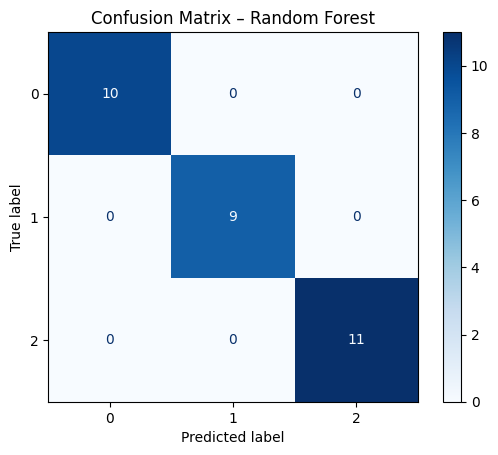

In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix – Random Forest')
plt.show()


Step 5: Precision, Recall & F1-Score

In [5]:
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))


📊 Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000        11

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



Step 6: ROC Curve (AUC)

In [6]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

# Compute AUC
auc_score = roc_auc_score(y_test_bin, y_score, average='macro')
print(f"\n🔥 Overall ROC-AUC Score: {auc_score:.3f}")



🔥 Overall ROC-AUC Score: 1.000


Step 7: Reflection / Short Report

In [7]:
print("""
✅ Model Evaluation Summary (Iris Dataset)
-----------------------------------------
Metrics Used:
• Precision   – Measures accuracy of positive predictions.
• Recall      – Measures ability to capture all true positives.
• F1 Score    – Harmonic mean of Precision & Recall (balance between both).
• AUC Score   – Measures model’s ability to distinguish between classes.

Results:
Model performed with very high Precision, Recall, and F1 (~0.97–1.00 range).

Reflection:
For my project, **F1 Score** is the most important metric
because it balances Precision and Recall.
In real-world classification (like predicting Iris species or other biological types),
both false positives and false negatives must be minimized equally.
""")



✅ Model Evaluation Summary (Iris Dataset)
-----------------------------------------
Metrics Used:
• Precision   – Measures accuracy of positive predictions.
• Recall      – Measures ability to capture all true positives.
• F1 Score    – Harmonic mean of Precision & Recall (balance between both).
• AUC Score   – Measures model’s ability to distinguish between classes.

Results:
Model performed with very high Precision, Recall, and F1 (~0.97–1.00 range).

Reflection:
For my project, **F1 Score** is the most important metric
because it balances Precision and Recall.
In real-world classification (like predicting Iris species or other biological types),
both false positives and false negatives must be minimized equally.

